In [16]:
print('hello my project!')

hello my project!


In [17]:
import yfinance as yf
BTC_Ticker = yf.Ticker("BTC-USD")
BTC_Data = BTC_Ticker.history(period="1y")
#display(BTC_Data)

BTC-USD: No price data found, symbol may be delisted (period=1y)


In [18]:
import yfinance as yf
from datetime import datetime

gold = yf.download(tickers="BTC-USD", period="5d", interval="1m")

start = datetime(2021, 10, 18, 9, 30, 0)
end = datetime(2021, 10, 18, 10, 30, 0)

filtered = gold[start: end]

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BTC-USD']: AttributeError("'str' object has no attribute 'get'")


In [19]:
from cryptocmd import CmcScraper

# initialise scraper without time interval for max historical data
scraper = CmcScraper("BTC")
# Pandas dataFrame for the same data
df = scraper.get_dataframe()

In [21]:
# initialise scraper with time interval for e.g a year from today
from datetime import date

today = date.today()
print(today.strftime("%d-%m-%Y"))
scraper = CmcScraper("BTC", "12-12-2020", today.strftime("%d-%m-%Y"))
# Pandas dataFrame for the same data
df = scraper.get_dataframe()

21-01-2024


In [23]:
#hw test 1st and second approach but the second one is more extensive
# get raw data as list of list
headers, data = scraper.get_data()

# get data in a json format
json_data = scraper.get_data("json")

# export the data to csv
scraper.export("csv",name='data')


In [24]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap',
       'Time Open', 'Time High', 'Time Low', 'Time Close'],
      dtype='object')


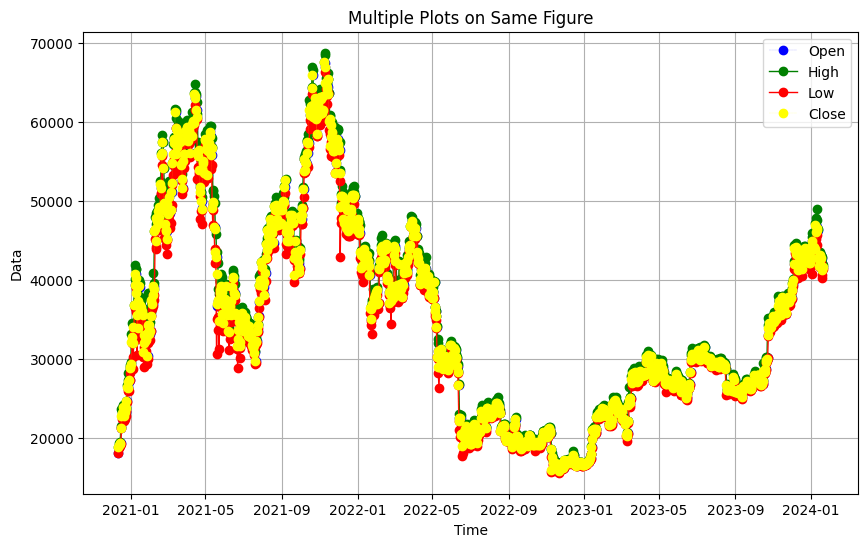

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Plot the DataFrame
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df['Date'], df['Open'], marker='o', lw=.1, linestyle='dashed', color='blue', label='Open')


# Plot the second dataset
ax.plot(df['Date'], df['High'], marker='o', lw=1, linestyle='-', color='green', label='High')

# Plot the third dataset
ax.plot(df['Date'], df['Low'], marker='o', lw=1, linestyle='-', color='red', label='Low')

# Plot the third dataset
ax.plot(df['Date'], df['Close'], marker='o', lw=.1 ,linestyle='dashed', color='yellow', label='Close')

# Set titles and labels
ax.set_title('Multiple Plots on Same Figure')
ax.set_xlabel('Time')
ax.set_ylabel('Data')

# Display legend
ax.legend()
plt.grid(True)
plt.show()



[[0.47270375 0.30222145 0.94392111]
 [0.27738353 0.00860609 0.47060914]
 [0.66568345 0.56716589 0.16760317]
 [0.41602218 0.66980919 0.79973812]
 [0.76347621 0.88271356 0.97942326]]
0
1
2
3
4


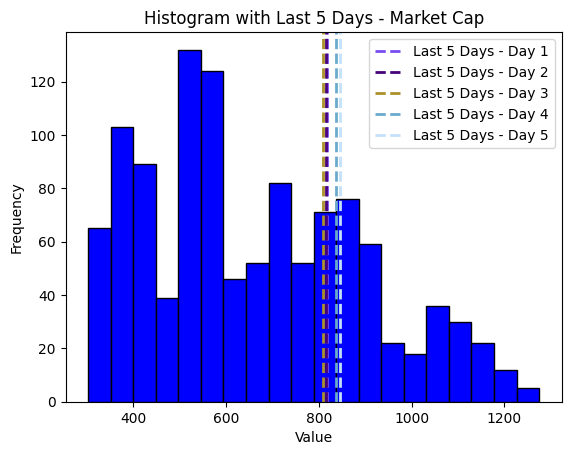

In [26]:
import numpy as np
# Plot the histogram
plt.hist(df['Market Cap']/1e9, bins=20, color='blue', edgecolor='black')

# Find the last 5 dates and corresponding values
last_5_dates = df['Date'].nlargest(5)
last_5_values = df.loc[df['Date'].isin(last_5_dates), 'Market Cap']

#latest_value = df.loc[df['Date'] == df['Date'].max(), 'Market Cap'][0]

# Generate random colors
line_colors = np.random.rand(5,3)
print(line_colors)


# Add vertical dashed lines for the last 5 days with random colors
for i, value in enumerate(last_5_values):
    plt.axvline(x=value/1e9, color=line_colors[i], linestyle='--', linewidth=2, label=f'Last 5 Days - Day {i+1}')
    print(i)

# Set titles and labels
plt.title('Histogram with Last 5 Days - Market Cap')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display legend
plt.legend()
# Show the plot
plt.show()

In [27]:
display(df)
print(type(df['Time High']))

,Date,Open,High,Low,Close,Volume,Market Cap,Time Open,Time High,Time Low,Time Close
0,2024-01-20,41624.589029,41877.893918,41446.823090,41665.584836,1.158669e+10,8.168012e+11,2024-01-20T00:00:00.000Z,2024-01-20T21:10:00.000Z,2024-01-20T00:39:00.000Z,2024-01-20T23:59:59.999Z
1,2024-01-19,41278.459185,42134.158975,40297.457858,41618.407365,2.575241e+10,8.158396e+11,2024-01-19T00:00:00.000Z,2024-01-19T20:15:00.000Z,2024-01-19T17:11:00.000Z,2024-01-19T23:59:59.999Z
2,2024-01-18,42742.311624,42876.346603,40631.170495,41262.058364,2.521836e+10,8.088191e+11,2024-01-18T00:00:00.000Z,2024-01-18T08:03:00.000Z,2024-01-18T20:37:00.000Z,2024-01-18T23:59:59.999Z
3,2024-01-17,43132.100339,43189.890511,42189.310528,42742.652837,2.085123e+10,8.378049e+11,2024-01-17T00:00:00.000Z,2024-01-17T01:29:00.000Z,2024-01-17T17:06:00.000Z,2024-01-17T23:59:59.999Z
4,2024-01-16,42499.337536,43566.274924,42085.996028,43154.944234,2.406287e+10,8.458552e+11,2024-01-16T00:00:00.000Z,2024-01-16T21:39:00.000Z,2024-01-16T14:45:00.000Z,2024-01-16T23:59:59.999Z
...,...,...,...,...,...,...,...,...,...,...,...
1130,2020-12-16,19418.818401,21458.907897,19298.317277,21310.598131,4.440901e+10,3.957999e+11,2020-12-16T00:00:00.000Z,2020-12-16T23:19:41.000Z,2020-12-16T00:31:39.000Z,2020-12-16T23:59:59.999Z
1131,2020-12-15,19246.919984,19525.007591,19079.842377,19417.076033,2.674198e+10,3.606148e+11,2020-12-15T00:00:00.000Z,2020-12-15T20:08:41.000Z,2020-12-15T05:19:41.000Z,2020-12-15T23:59:59.999Z
1132,2020-12-14,19144.492460,19305.100443,19012.709408,19246.644341,2.247400e+10,3.574326e+11,2020-12-14T00:00:00.000Z,2020-12-14T23:21:27.000Z,2020-12-14T01:04:41.000Z,2020-12-14T23:59:59.999Z
1133,2020-12-13,18806.766479,19381.535773,18734.332888,19142.382534,2.545047e+10,3.554792e+11,2020-12-13T00:00:00.000Z,2020-12-13T13:07:39.000Z,2020-12-13T00:40:43.000Z,2020-12-13T23:59:59.999Z


<class 'pandas.core.series.Series'>


<function matplotlib.pyplot.show(close=None, block=None)>

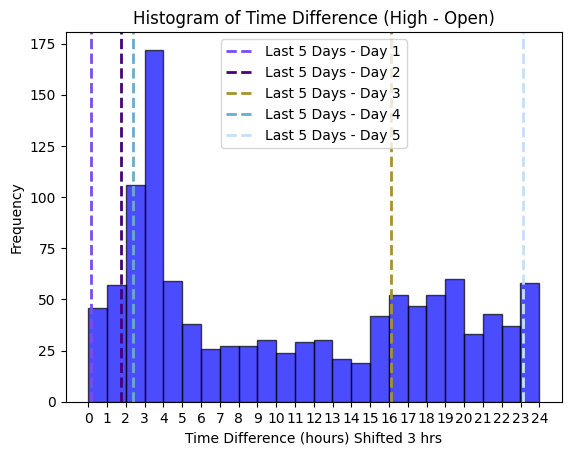

In [28]:
df_ = pd.DataFrame(df)
# Convert 'Time Open' and 'Time High' columns to datetime
df_['Time Open'] = pd.to_datetime(df['Time Open'])
df_['Time High'] = pd.to_datetime(df['Time High'])

# Calculate time difference between 'Time High' and 'Time Open'
df_['Time Difference'] = (df_['Time High'] - df_['Time Open']).dt.total_seconds() / 60 / 60  # Convert to hours
df_['Time Difference Shifted'] = (df_['Time Difference'] + 3 ) % 24
# Plot the histogram
plt.hist(df_['Time Difference Shifted'] , bins=24, color='blue', edgecolor='black', alpha=0.7)

# Add vertical dashed lines for the last 5 days
for i in range(0, 5):
    if i <= len(df):
        last_day_value = df_.iloc[-i]['Time Difference Shifted'] 
        plt.axvline(x=last_day_value, color=line_colors[i], linestyle='--', linewidth=2, label=f'Last 5 Days - Day {i+1}')

# Set titles and labels
plt.title('Histogram of Time Difference (High - Open)')
plt.xlabel('Time Difference (hours) Shifted 3 hrs')
plt.ylabel('Frequency')
plt.xticks(np.arange(25))

# Display legend
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

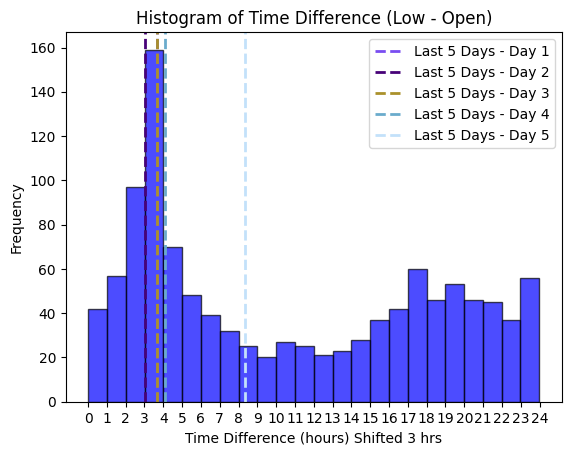

In [29]:
# Convert 'Time Open' and 'Time High' columns to datetime
df_['Time Open'] = pd.to_datetime(df['Time Open'])
df_['Time Low'] = pd.to_datetime(df['Time Low'])

# Calculate time difference between 'Time High' and 'Time Open'
df_['Time Difference Low'] = (df_['Time Low'] - df_['Time Open']).dt.total_seconds() / 60 / 60  # Convert to hours
df_['Time Difference Shifted Low'] = (df_['Time Difference Low'] + 3 ) % 24
# Plot the histogram
plt.hist(df_['Time Difference Shifted Low'] , bins=24, color='blue', edgecolor='black', alpha=0.7)

# Add vertical dashed lines for the last 5 days
for i in range(0, 5):
    if i <= len(df):
        last_day_value = df_.iloc[-i]['Time Difference Shifted Low'] 
        plt.axvline(x=last_day_value, color=line_colors[i], linestyle='--', linewidth=2, label=f'Last 5 Days - Day {i+1}')

# Set titles and labels
plt.title('Histogram of Time Difference (Low - Open)')
plt.xlabel('Time Difference (hours) Shifted 3 hrs')
plt.ylabel('Frequency')
plt.xticks(np.arange(25))

# Display legend
plt.legend()

plt.show

,Date,Open,High,Low,Close,Volume,Market Cap,Time Open,Time High,Time Low,Time Close,Delta,Mean,Percentage Delta,Sign
0,2024-01-20,41624.589029,41877.893918,41446.823090,41665.584836,1.158669e+10,8.168012e+11,2024-01-20T00:00:00.000Z,2024-01-20T21:10:00.000Z,2024-01-20T00:39:00.000Z,2024-01-20T23:59:59.999Z,431.070827,41662.358504,1.034677,1
1,2024-01-19,41278.459185,42134.158975,40297.457858,41618.407365,2.575241e+10,8.158396e+11,2024-01-19T00:00:00.000Z,2024-01-19T20:15:00.000Z,2024-01-19T17:11:00.000Z,2024-01-19T23:59:59.999Z,1836.701117,41215.808416,4.456303,1
2,2024-01-18,42742.311624,42876.346603,40631.170495,41262.058364,2.521836e+10,8.088191e+11,2024-01-18T00:00:00.000Z,2024-01-18T08:03:00.000Z,2024-01-18T20:37:00.000Z,2024-01-18T23:59:59.999Z,2245.176108,41753.758549,-5.377183,-1
3,2024-01-17,43132.100339,43189.890511,42189.310528,42742.652837,2.085123e+10,8.378049e+11,2024-01-17T00:00:00.000Z,2024-01-17T01:29:00.000Z,2024-01-17T17:06:00.000Z,2024-01-17T23:59:59.999Z,1000.579983,42689.600519,-2.343849,-1
4,2024-01-16,42499.337536,43566.274924,42085.996028,43154.944234,2.406287e+10,8.458552e+11,2024-01-16T00:00:00.000Z,2024-01-16T21:39:00.000Z,2024-01-16T14:45:00.000Z,2024-01-16T23:59:59.999Z,1480.278896,42826.135476,3.456485,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,2020-12-16,19418.818401,21458.907897,19298.317277,21310.598131,4.440901e+10,3.957999e+11,2020-12-16T00:00:00.000Z,2020-12-16T23:19:41.000Z,2020-12-16T00:31:39.000Z,2020-12-16T23:59:59.999Z,2160.590620,20378.612587,10.602246,1
1131,2020-12-15,19246.919984,19525.007591,19079.842377,19417.076033,2.674198e+10,3.606148e+11,2020-12-15T00:00:00.000Z,2020-12-15T20:08:41.000Z,2020-12-15T05:19:41.000Z,2020-12-15T23:59:59.999Z,445.165213,19302.424984,2.306266,1
1132,2020-12-14,19144.492460,19305.100443,19012.709408,19246.644341,2.247400e+10,3.574326e+11,2020-12-14T00:00:00.000Z,2020-12-14T23:21:27.000Z,2020-12-14T01:04:41.000Z,2020-12-14T23:59:59.999Z,292.391036,19158.904925,1.526136,1
1133,2020-12-13,18806.766479,19381.535773,18734.332888,19142.382534,2.545047e+10,3.554792e+11,2020-12-13T00:00:00.000Z,2020-12-13T13:07:39.000Z,2020-12-13T00:40:43.000Z,2020-12-13T23:59:59.999Z,647.202885,19057.934331,3.395976,1


34.66262482141108


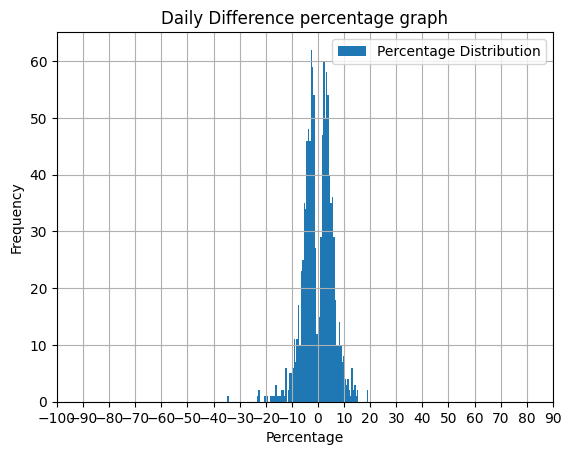

In [47]:
import numpy as np 
df['Delta'] = df['High']-df['Low']
df['Mean']  = df[['High','Low']].mean(axis = 1)
df['Sign']  = np.where(df['Close']>df['Open'],1,-1)
df['Percentage Delta'] = df['Delta']/df['Mean'] *100 * df['Sign']
display(df)

plt.hist(df['Percentage Delta'],bins=100,label=f'Percentage Distribution')

plt.title('Daily Difference percentage graph')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.xticks(np.arange(-100,100,10))

# Display legend
plt.legend()
plt.grid()

plt.show

print(df['Percentage Delta'].abs().max())